# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 18.11.2022

Мягий дедлайн: 23:59MSK 30.11.2022

Жестокий дедлайн: 23:59MSK 06.12.2022

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/43413/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__



https://contest.yandex.ru/contest/43413/run-report/77459230/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

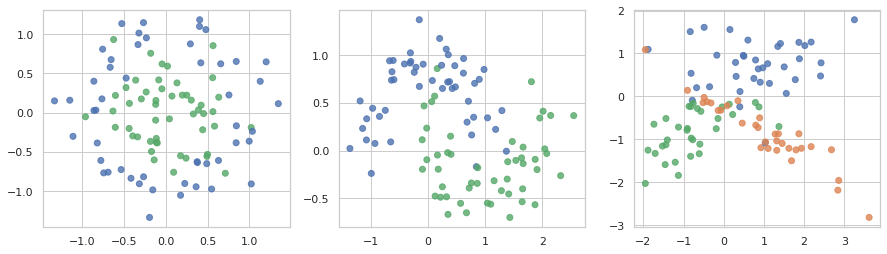

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

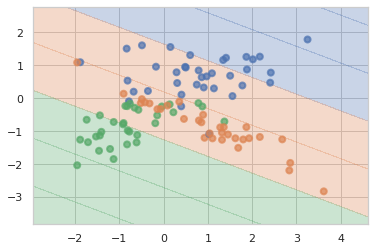

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Train:  1.0
Test:  0.8


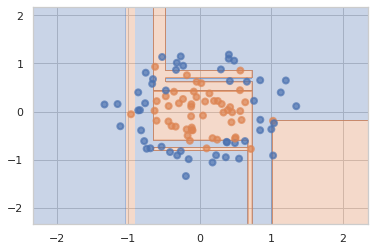

In [7]:
from sklearn.metrics import accuracy_score

X, y = datasets[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print('Train: ', accuracy_score(y_train, tree.predict(X_train)))
print('Test: ',accuracy_score(y_test, y_pred))

plot_surface(tree, X, y)

Train:  1.0
Test:  1.0


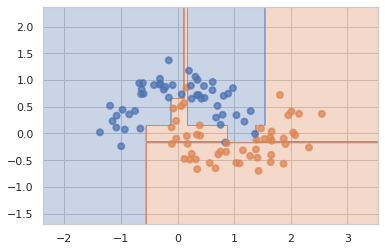

In [8]:
X, y = datasets[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print('Train: ', accuracy_score(y_train, tree.predict(X_train)))
print('Test: ',accuracy_score(y_test, y_pred))

plot_surface(tree, X, y)

Train:  1.0
Test:  0.7


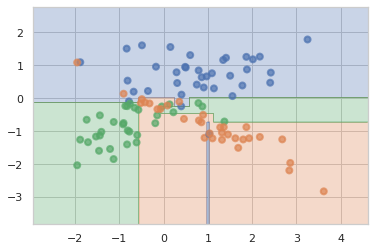

In [9]:
X, y = datasets[2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print('Train: ', accuracy_score(y_train, tree.predict(X_train)))
print('Test: ',accuracy_score(y_test, y_pred))

plot_surface(tree, X, y)

__Ответ:__ мы очень сильно переобучились

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [10]:
params = {'max_depth': [1, 2, 4, 8], 'min_samples_leaf': [1, 2, 4]}

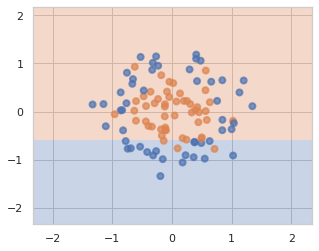

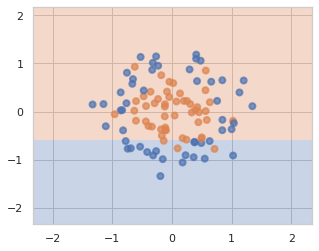

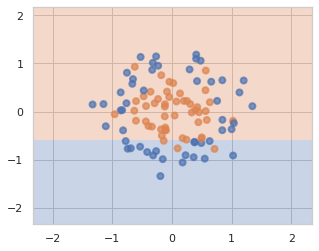

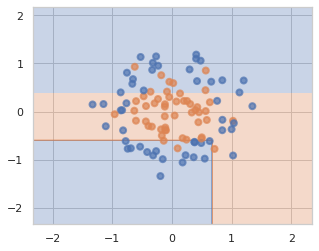

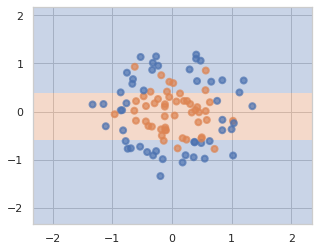

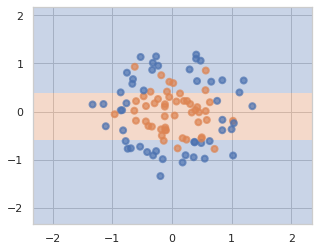

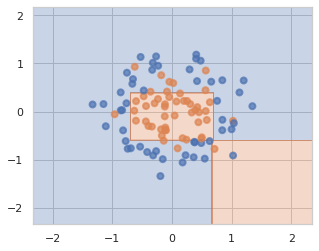

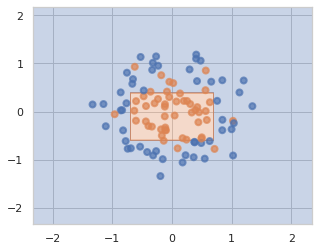

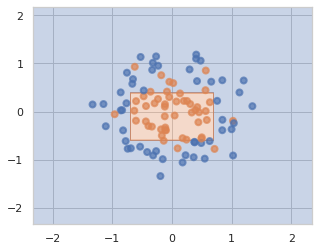

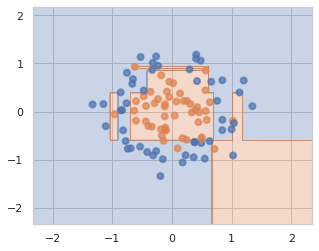

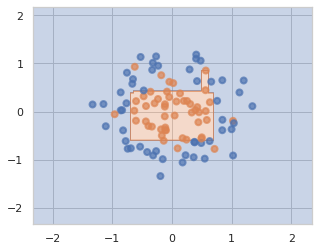

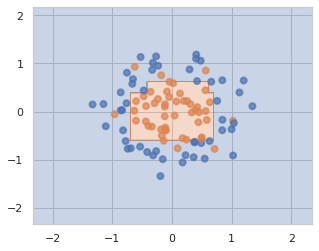

In [11]:
X, y = datasets[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=66)

tree = DecisionTreeClassifier()
gs = GridSearchCV(tree, param_grid=params, cv=5, scoring='accuracy', return_train_score=True)
gs.fit(X_train, y_train)

results = pd.DataFrame({'depth': [], 'leaves': [], 'train_score': [], 'test_score': []})
for i, param in enumerate(gs.cv_results_['params']):
    depth, leaves = param['max_depth'], param['min_samples_leaf']
    tree = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaves)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    plt.figure(figsize=(5, 4))
    plot_surface(tree, X, y)
    results.loc[i] = [depth, leaves, accuracy_score(y_train, tree.predict(X_train)), accuracy_score(y_test, y_pred)]

In [12]:
results

,depth,leaves,train_score,test_score
0,1.0,1.0,0.666667,0.5
1,1.0,2.0,0.666667,0.5
2,1.0,4.0,0.666667,0.5
3,2.0,1.0,0.788889,0.5
4,2.0,2.0,0.777778,0.6
5,2.0,4.0,0.777778,0.6
6,4.0,1.0,0.900000,0.7
7,4.0,2.0,0.877778,0.8
8,4.0,4.0,0.877778,0.8
9,8.0,1.0,0.988889,0.7


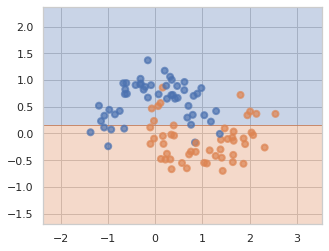

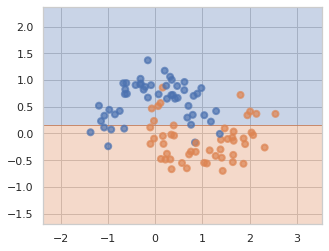

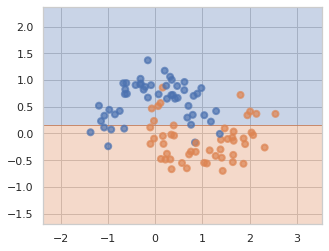

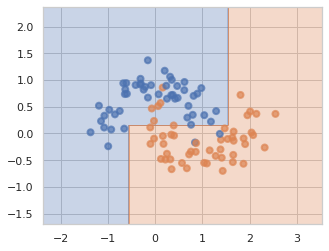

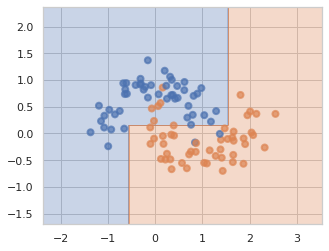

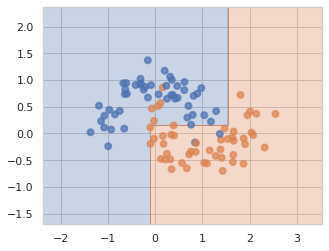

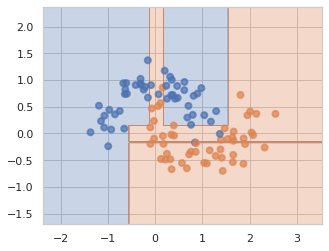

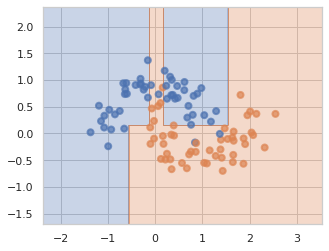

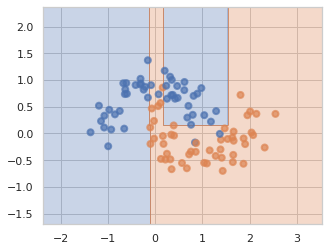

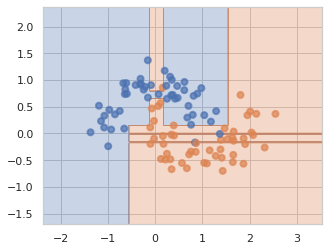

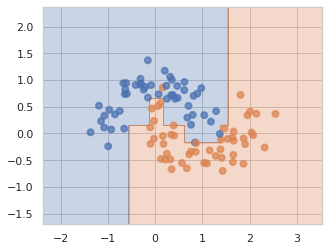

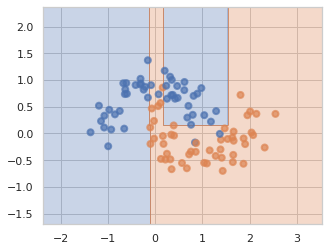

In [13]:
X, y = datasets[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=66)

tree = DecisionTreeClassifier()
gs = GridSearchCV(tree, param_grid=params, cv=5, scoring='accuracy', return_train_score=True)
gs.fit(X_train, y_train)

results = pd.DataFrame({'depth': [], 'leaves': [], 'train_score': [], 'test_score': []})
for i, param in enumerate(gs.cv_results_['params']):
    depth, leaves = param['max_depth'], param['min_samples_leaf']
    tree = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaves)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    plt.figure(figsize=(5, 4))
    plot_surface(tree, X, y)
    results.loc[i] = [depth, leaves, accuracy_score(y_train, tree.predict(X_train)), accuracy_score(y_test, y_pred)]

In [14]:
results

,depth,leaves,train_score,test_score
0,1.0,1.0,0.833333,0.8
1,1.0,2.0,0.833333,0.8
2,1.0,4.0,0.833333,0.8
3,2.0,1.0,0.922222,1.0
4,2.0,2.0,0.922222,1.0
5,2.0,4.0,0.911111,1.0
6,4.0,1.0,0.977778,0.9
7,4.0,2.0,0.966667,0.9
8,4.0,4.0,0.955556,0.9
9,8.0,1.0,1.000000,0.9


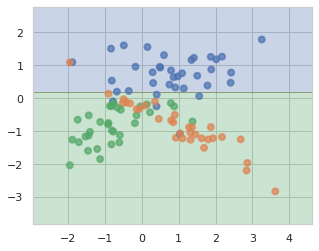

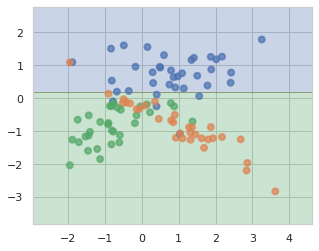

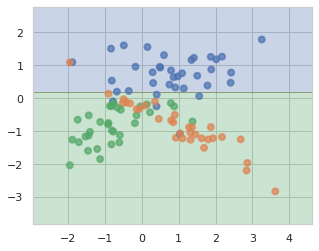

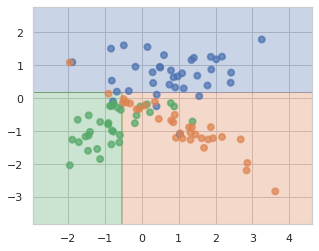

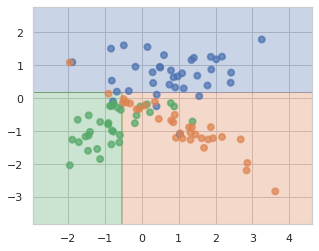

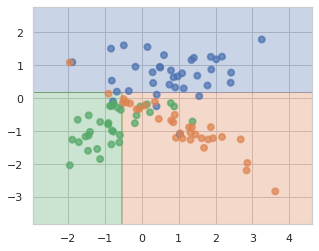

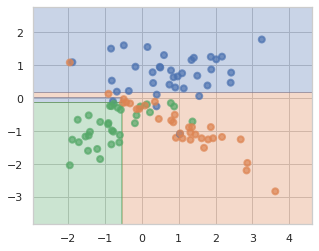

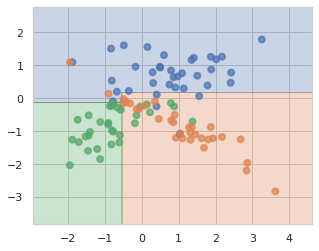

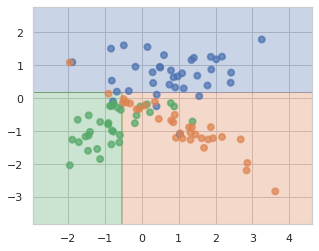

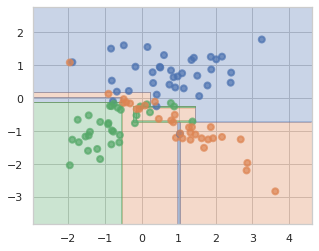

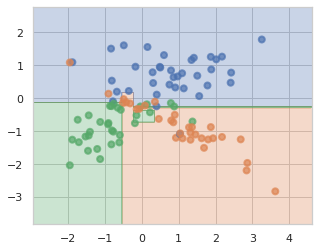

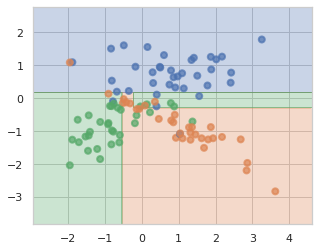

In [15]:
X, y = datasets[2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=66)

tree = DecisionTreeClassifier()
gs = GridSearchCV(tree, param_grid=params, cv=5, scoring='accuracy', return_train_score=True)
gs.fit(X_train, y_train)

results = pd.DataFrame({'depth': [], 'leaves': [], 'train_score': [], 'test_score': []})
for i, param in enumerate(gs.cv_results_['params']):
    depth, leaves = param['max_depth'], param['min_samples_leaf']
    tree = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaves)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    plt.figure(figsize=(5, 4))
    plot_surface(tree, X, y)
    results.loc[i] = [depth, leaves, accuracy_score(y_train, tree.predict(X_train)), accuracy_score(y_test, y_pred)]

In [16]:
results

,depth,leaves,train_score,test_score
0,1.0,1.0,0.633333,0.5
1,1.0,2.0,0.633333,0.5
2,1.0,4.0,0.633333,0.5
3,2.0,1.0,0.877778,0.6
4,2.0,2.0,0.877778,0.6
5,2.0,4.0,0.877778,0.6
6,4.0,1.0,0.900000,0.6
7,4.0,2.0,0.888889,0.6
8,4.0,4.0,0.877778,0.6
9,8.0,1.0,0.977778,0.6


__Ответ:__ в первом датасее при увеличении второго параметра уменьшается переобучение, во втором датасете почти ничего не меняется, в третьем при увеличении глубины улучшается трейн скор, но данные хорошо перемешаны поэтому почти ничего не меняется.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

In [17]:
from hw5code import find_best_split

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [18]:
df = pd.read_csv("students.csv")

df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [19]:
target = df['UNS'].values
stg = df["STG"].values
scg = df["SCG"].values
stR = df["STR"].values
lpr = df["LPR"].values
peg = df["PEG"].values

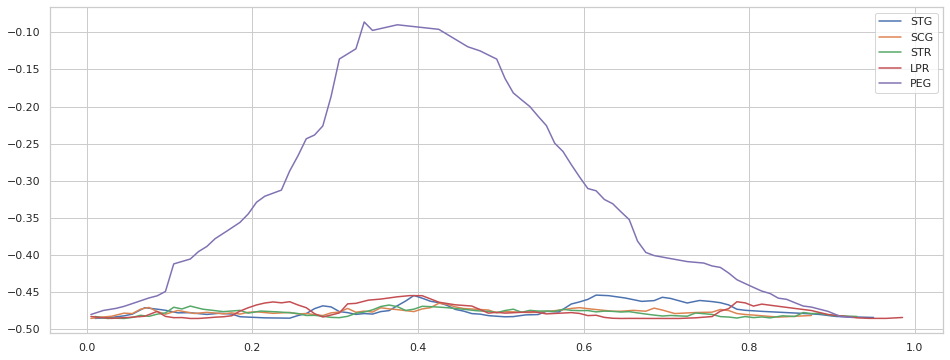

In [22]:
stg_res = find_best_split(stg, target) 
stg_threshold, stg_gini = list(stg_res[0]), list(stg_res[1])
scg_res = find_best_split(scg, target) 
scg_threshold, scg_gini = list(scg_res[0]), list(scg_res[1])
stR_res = find_best_split(stR, target) 
stR_threshold, stR_gini = list(stR_res[0]), list(stR_res[1])
lpr_res = find_best_split(lpr, target) 
lpr_threshold, lpr_gini = list(lpr_res[0]), list(lpr_res[1])
peg_res = find_best_split(peg, target) 
peg_threshold, peg_gini = list(peg_res[0]), list(peg_res[1])

plt.figure(figsize=(16, 6))
plt.plot(stg_threshold, stg_gini, label='STG')
plt.plot(scg_threshold, scg_gini, label='SCG')
plt.plot(stR_threshold, stR_gini, label='STR')
plt.plot(lpr_threshold, lpr_gini, label='LPR')
plt.plot(peg_threshold, peg_gini, label='PEG')
plt.legend()

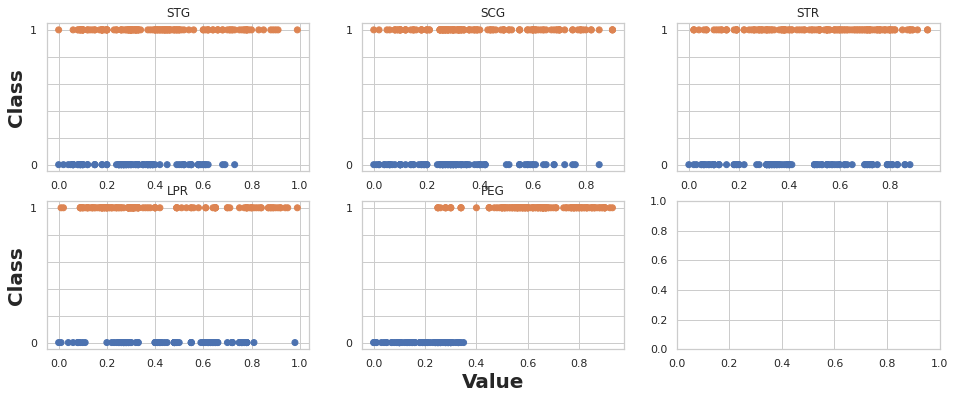

In [26]:
fig, axs = plt.subplots(2, 3, figsize=(16, 6))

palette = sns.color_palette(n_colors=2)
cmap = ListedColormap(palette)

for i in range(5):
    axs[i // 3][i % 3].scatter(df[df.columns[i]], target, cmap=cmap, c=target)
    axs[i // 3][i % 3].set_title(df.columns[i])
    axs[i // 3][i % 3].set_yticklabels([None, 0, None, None, None, None, 1])
    
    if i % 3 == 0:
        axs[i // 3][i % 3].set_ylabel('Class', weight='bold', size=20)
        
    if i // 3 == 1 and i == 4:
        axs[i // 3][i % 3].set_xlabel('Value', weight='bold', size=20)


__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** деление нужно производить по признаку PEG(это согласуется с графиками), вид кривой должен быть как парабола с ветвями вниз, в то время как кривые плохих признаков, выглядят как горизонтальные прямые.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    

__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

Вставьте что угодно, описывающее ваши впечатления от этого задания:

не успел сделать последние два номера до мягкого деда, но как то уже лениво доделывать.